In [1]:
import creds
import riotwatcher as rtw
import pandas as pd
import numpy as np
import mylibraries as my
import matplotlib.pyplot as plt

Make connection to API

In [2]:
connection = rtw.LolWatcher(creds.riot_API_Key)


Obtener jugador

In [3]:
Nombre_jugador = input("Ingresa tu nombre de usuario: ")
print("Elige tu region")
regiones = {1:"BR1",2:"EUNE1",3:"EUW1",4:"JP1",5:"KR",6:"LA1",7:"LA2",8:"NA1",9:"OC1",10:"TR1",11:"RU",12:"PH2",13:"SG2",14:"TH2",15:"TW2",16:"VN2"}

for region in regiones:
    print(region," ",regiones[region])

while(True):
    region = int(input())
    if region < 1 or region > 16:
        print("Region no reconocida, intenta de nuevo")
    else:
        break

region = regiones[region]
try:
    jugador = connection.summoner.by_name(region = region, summoner_name=Nombre_jugador)
    print("Jugador encontrado!")
except:
    print("Jugador no encontrado")

Elige tu region
1   BR1
2   EUNE1
3   EUW1
4   JP1
5   KR
6   LA1
7   LA2
8   NA1
9   OC1
10   TR1
11   RU
12   PH2
13   SG2
14   TH2
15   TW2
16   VN2
Jugador encontrado!


# Mejores campeones

In [4]:
Maestrias = connection.champion_mastery.by_summoner(region=region,encrypted_summoner_id=jugador["id"])
campeones = my.GetChampsNamesAndMasteries(Maestrias)

Maestria = pd.DataFrame(campeones, columns=["Campeon","Puntos de maestria","Tipo"])
Maestria.to_csv("Jugadores/"+Nombre_jugador+".csv",index=False)
Maestria


,Campeon,Puntos de maestria,Tipo
0,MonkeyKing,45657,"[Fighter, Tank]"
1,JarvanIV,41075,"[Tank, Fighter]"
2,Poppy,34496,"[Tank, Fighter]"
3,Sejuani,30602,"[Tank, Fighter]"
4,Vi,27485,"[Fighter, Assassin]"
...,...,...,...
67,Ezreal,159,"[Marksman, Mage]"
68,MissFortune,143,[Marksman]
69,Tryndamere,135,"[Fighter, Assassin]"
70,Sona,133,"[Support, Mage]"


#### Grafica de maestrias

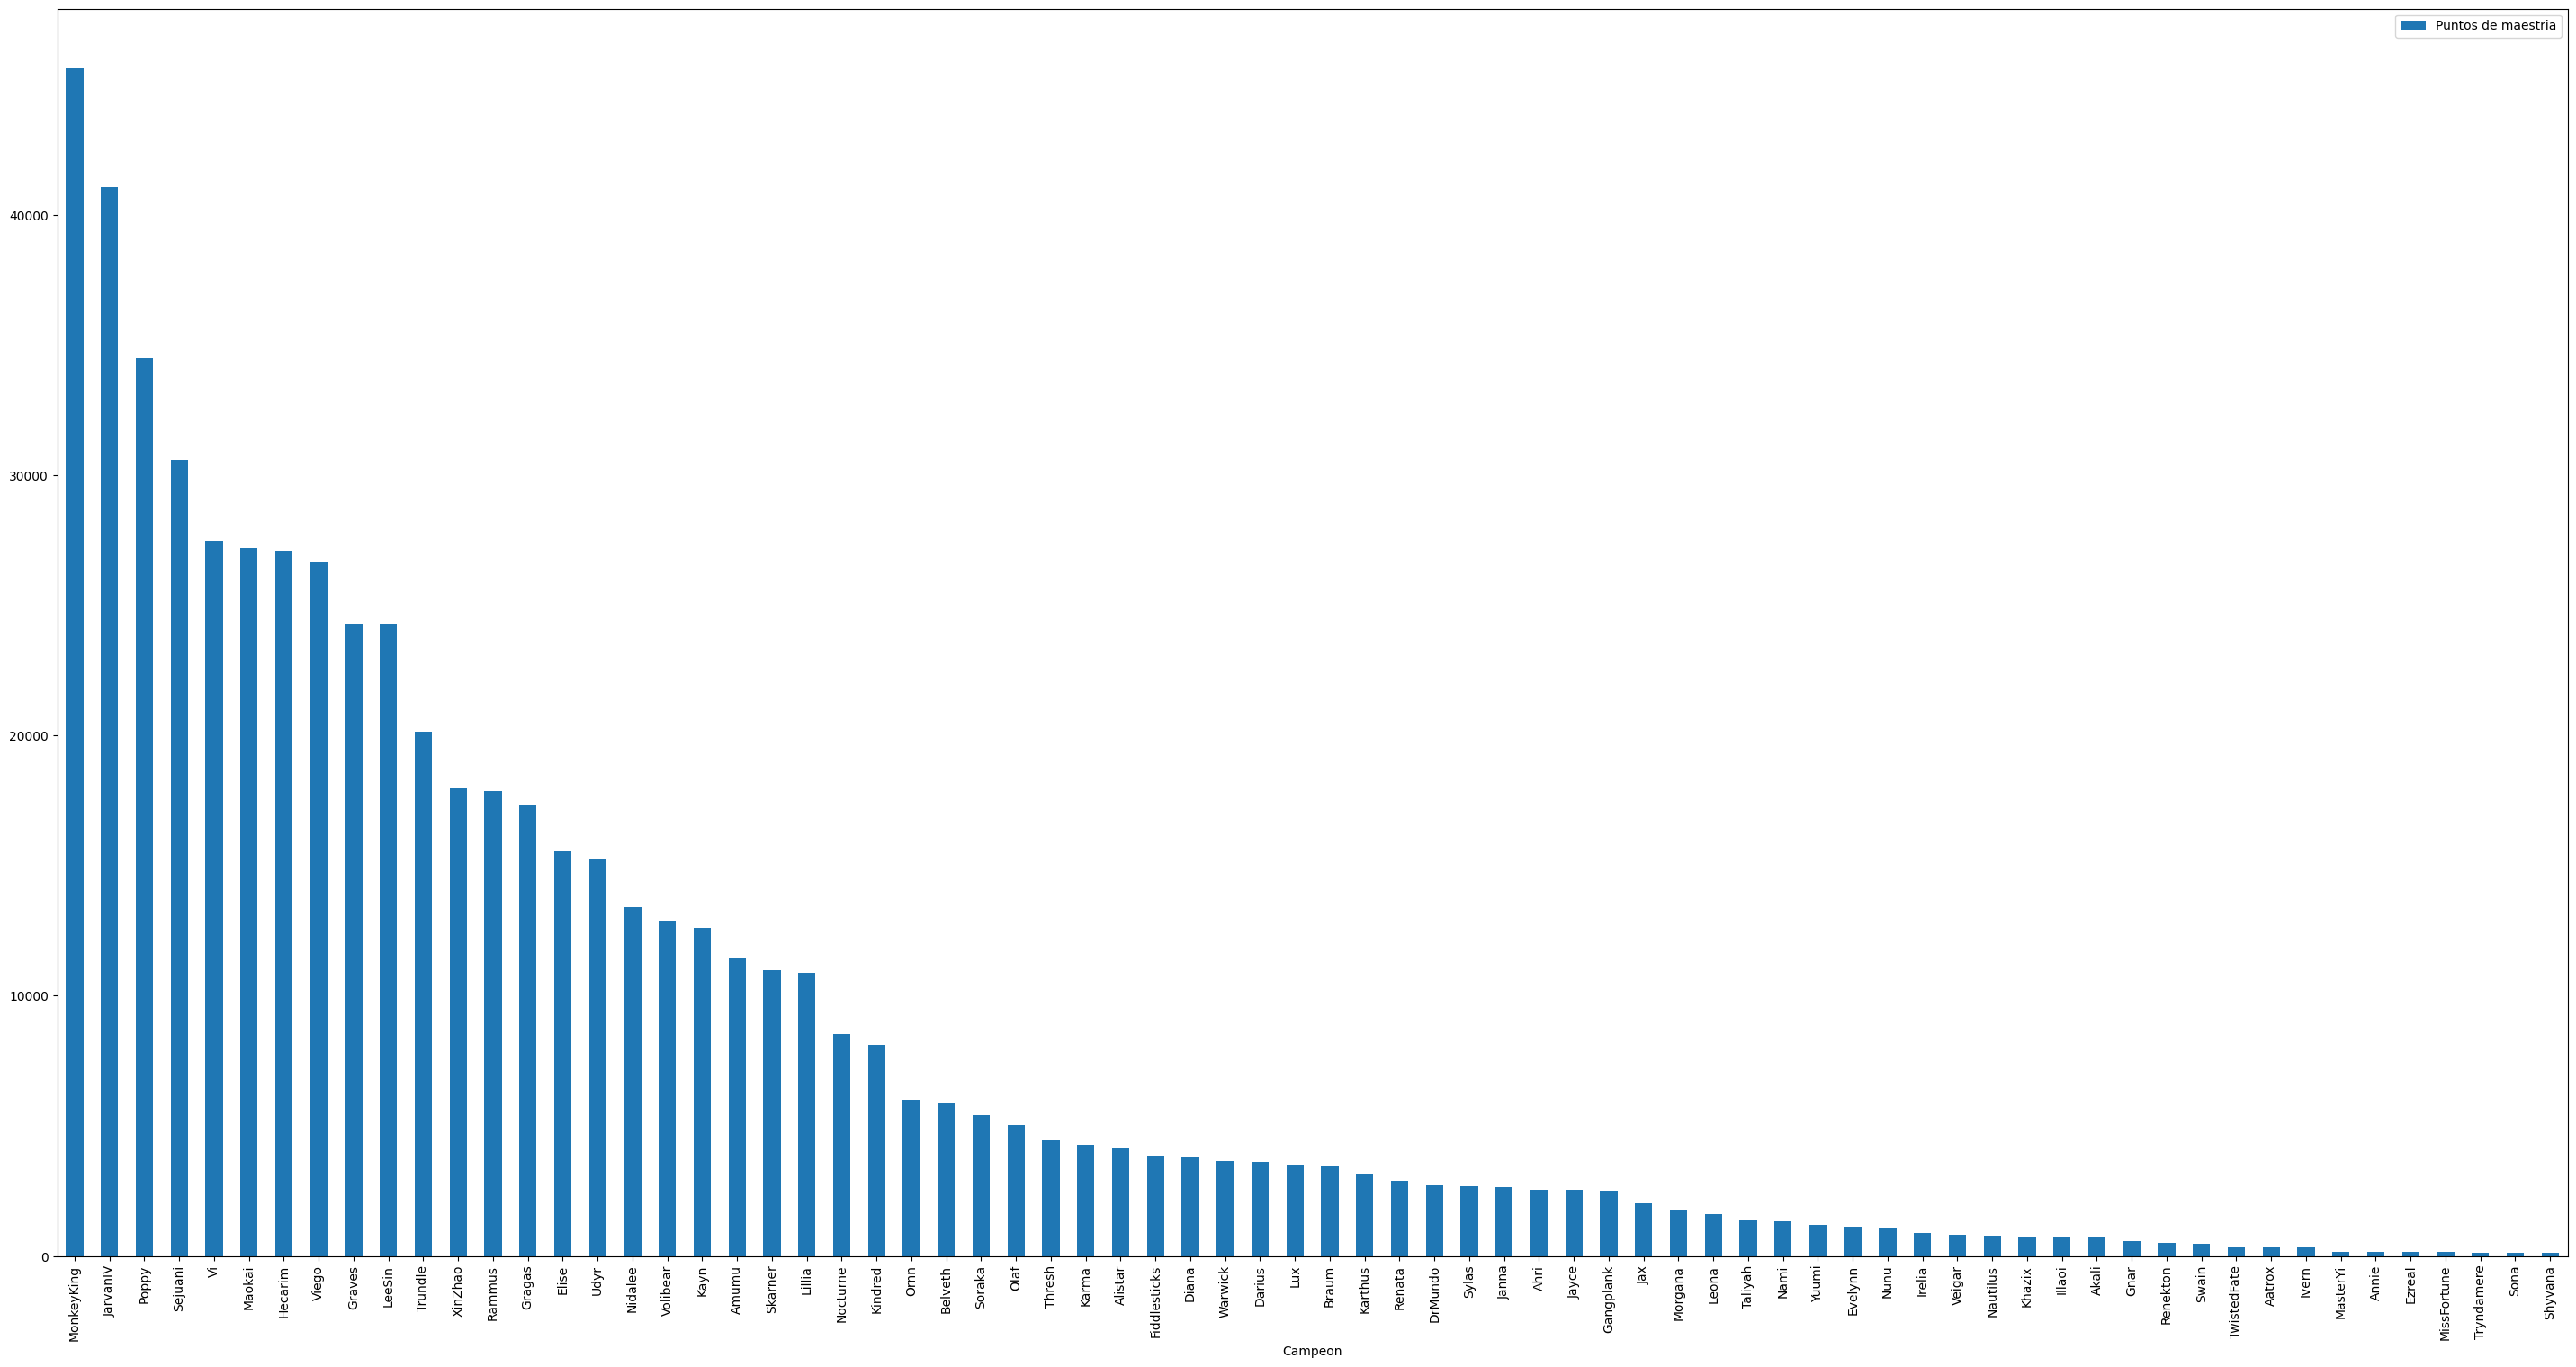

In [5]:
size = len(Maestria)/2
Maestria.plot.bar(x = "Campeon", y = "Puntos de maestria", figsize = (size,size/2))
plt.show()

# Partidas

In [8]:
partidas = connection.match
partidas = my.getMatchList(puuid=jugador["puuid"], cantidadPartidas= 300)
print(partidas)
print(len(partidas))

['LA1_1378122152', 'LA1_1378101916', 'LA1_1377699022', 'LA1_1376324302', 'LA1_1376304740', 'LA1_1376288670', 'LA1_1375718414', 'LA1_1375703888', 'LA1_1375271070', 'LA1_1375251841', 'LA1_1375214914', 'LA1_1375109377', 'LA1_1374810255', 'LA1_1374807022', 'LA1_1374783434', 'LA1_1374755006', 'LA1_1374376318', 'LA1_1374318864', 'LA1_1374304325', 'LA1_1373992496', 'LA1_1373198578', 'LA1_1373182767', 'LA1_1373150469', 'LA1_1372890662', 'LA1_1372873872', 'LA1_1372854742', 'LA1_1372773980', 'LA1_1372762291', 'LA1_1372747009', 'LA1_1372742131', 'LA1_1372722319', 'LA1_1372472115', 'LA1_1372435381', 'LA1_1372411806', 'LA1_1372391594', 'LA1_1372093542', 'LA1_1372046979', 'LA1_1371756665', 'LA1_1371740369', 'LA1_1371718784', 'LA1_1371399665', 'LA1_1371377855', 'LA1_1371359653', 'LA1_1370460371', 'LA1_1370294333', 'LA1_1370260549', 'LA1_1370168844', 'LA1_1370154044', 'LA1_1370146843', 'LA1_1370130572', 'LA1_1370104111', 'LA1_1369867457', 'LA1_1369840175', 'LA1_1369804736', 'LA1_1369783633', 'LA1_1369

In [7]:
jugador

{'id': 'lSxjo9PcLdqfX0xNdRtqCqsJs-wluUYc81ZQgZ1zz1LHzEaaQvJ_vDD2zA',
 'accountId': 'ISVeKqcd5Vqevl6nzh_jdqnWoTSghH4OVu4z1hwgZz-EVfeQ6E9DH5Dt',
 'puuid': '_ROPUnorv3aVovk2pvxxKOpkipZxHUZJH-yOToXlJLZ7397Ubg0R_NJS3H4rG_RjgpidV1dVBkveOA',
 'name': 'Antthoss',
 'profileIconId': 5332,
 'revisionDate': 1681526139056,
 'summonerLevel': 104}